In [1]:
import pandas as pd
from main_module import main
from main_module import config
from indicators import supertrend
import yfinance as yf
import numpy as np
import talib
import plotly.graph_objects as go


In [5]:
args = config.Config("config.yaml")
s,e = args.parse_period("3d") 
df = main.capitalize(args)
#price = vbt.YFData.download('AAPL').get('Close')


[*********************100%%**********************]  1 of 1 completed
closing_price:  103.19999694824219
openingprice:  103.02999877929688
1d difference:  0.16499871004509067


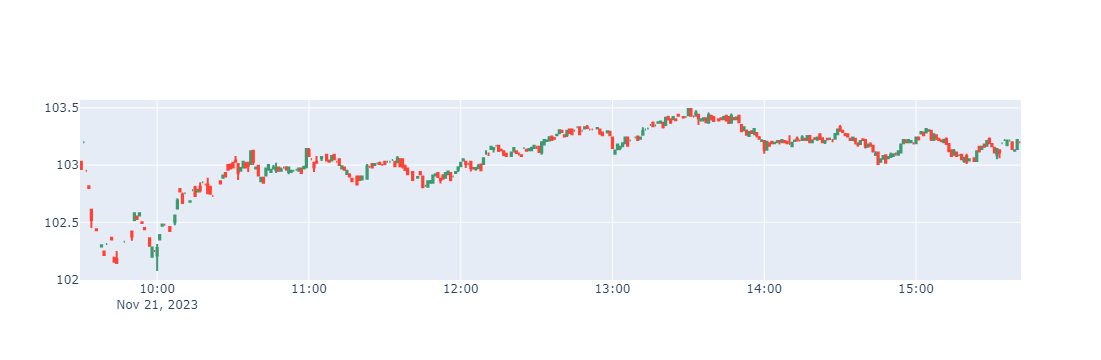

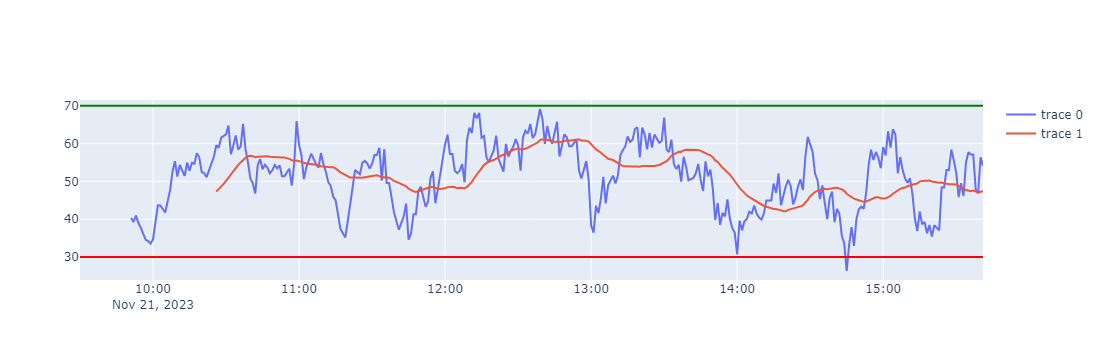

In [62]:
df = yf.download("DTE", period="1d", interval='1m')
#print(df.to_markdown())

opening_price = df["Open"].iloc[0]
closing_price = df["Close"].iloc[-1]

print("closing_price: ", closing_price)
print("openingprice: ", opening_price)
print("1d difference: ", ( closing_price - opening_price ) * 100 / opening_price )
rsi = talib.RSI(df["Close"])
sma = talib.SMA(rsi)
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_xaxes(
    rangebreaks=[
        dict(bounds=[17, 9], pattern="hour"), #hide hours outside of 9am-5pm
    ]
)
fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "sun"]), #hide weekends
        dict(values=["2015-12-25", "2016-01-01"])  # hide Christmas and New Year's
    ]
)
fig.show()

fig = go.Figure([go.Scatter(x=df.index, y=rsi), go.Scatter(x=df.index, y=sma)])
fig.add_hline(y=70, line=dict(color='Green'))
fig.add_hline(y=30, line=dict(color='Red'))
fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), #hide weekends
        dict(values=["2015-12-25", "2016-01-01"])  # hide Christmas and New Year's
    ]
)
fig.update_xaxes(
    rangebreaks=[
        dict(bounds=[17, 9], pattern="hour"), #hide hours outside of 9am-5pm
    ]
)
fig.show()

In [ ]:
from openai import OpenAI

client = OpenAI(
    # defaults to os.environ.get("OPENAI_API_KEY")
    api_key=args.openai_api_key,
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Say this is a test",
        }
    ],
    model="gpt-3.5-turbo",
)